In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
# Q1: Import the dataset
# Load the dataset
df = pd.read_csv("Variant.csv")

In [3]:
# Q2: Clean the dataset
# Display dataset information
print("Dataset Overview:\n", df.info())
print("\nStatistical Summary:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [4]:
# Handle issing values
df = df.dropna()

In [5]:
# Drop duplicate rows
df = df.drop_duplicates()

In [6]:
# Convert categorical variables to numeric using Label Encoding
categorical_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


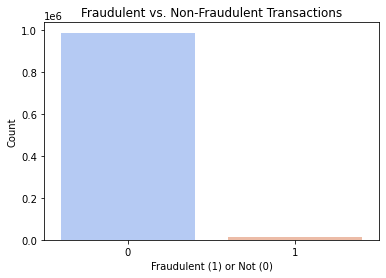

In [7]:
# Q3: Research Questions & Visualizations

## Question 1: What is the proportion of fraudulent vs. non-fraudulent transactions?
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud_bool', data=df, palette="coolwarm")
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Fraudulent (1) or Not (0)")
plt.ylabel("Count")
plt.show()

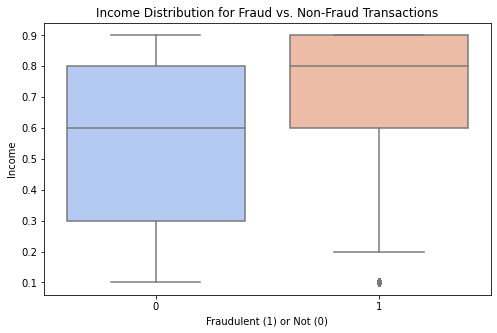

In [8]:
## Question 2: How does income distribution vary for fraudulent transactions?
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='income', data=df, palette="coolwarm")
plt.title("Income Distribution for Fraud vs. Non-Fraud Transactions")
plt.xlabel("Fraudulent (1) or Not (0)")
plt.ylabel("Income")
plt.show()

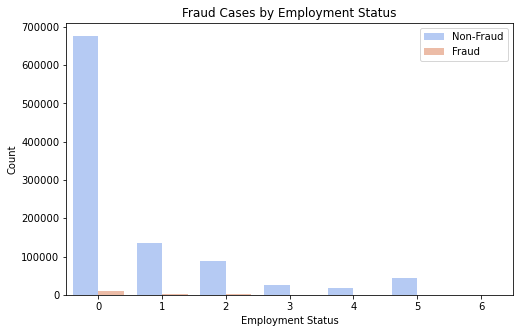

In [9]:
## Question 3: Does employment status influence fraud probability?
plt.figure(figsize=(8, 5))
sns.countplot(x='employment_status', hue='fraud_bool', data=df, palette="coolwarm")
plt.title("Fraud Cases by Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

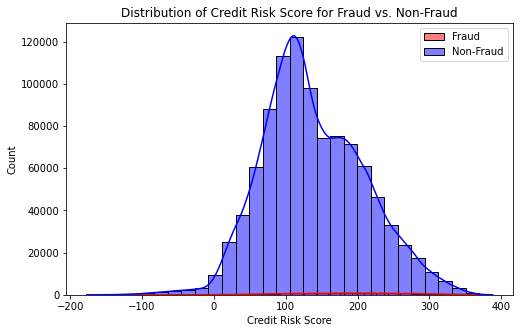

In [10]:
## Question 4: Is there a relationship between credit risk score and fraud?
plt.figure(figsize=(8, 5))
sns.histplot(df[df['fraud_bool'] == 1]['credit_risk_score'], bins=30, kde=True, color='red', label="Fraud")
sns.histplot(df[df['fraud_bool'] == 0]['credit_risk_score'], bins=30, kde=True, color='blue', label="Non-Fraud")
plt.title("Distribution of Credit Risk Score for Fraud vs. Non-Fraud")
plt.xlabel("Credit Risk Score")
plt.legend()
plt.show()

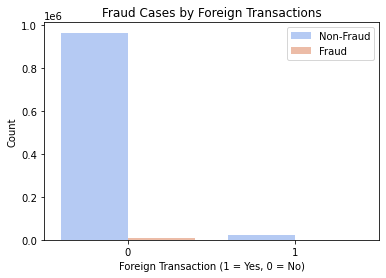

In [11]:
## Question 5: How do foreign transactions compare in fraud rates?
plt.figure(figsize=(6, 4))
sns.countplot(x='foreign_request', hue='fraud_bool', data=df, palette="coolwarm")
plt.title("Fraud Cases by Foreign Transactions")
plt.xlabel("Foreign Transaction (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"])
plt.show()

In [13]:
 #Q4: Train Three Machine Learning Models

# Separate features and target variable
X = df.drop(columns=['fraud_bool'])  # Features
y = df['fraud_bool']  # Target variable


In [14]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}


Logistic Regression Performance:
Accuracy: 0.99075
Precision: 0.8739495798319328
Recall: 0.1885766092475068
F1 Score: 0.31021625652498136


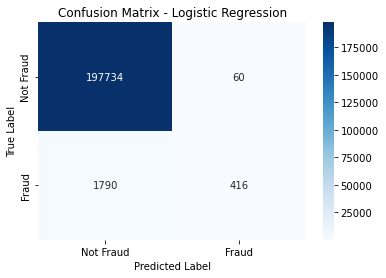


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    197794
           1       0.87      0.19      0.31      2206

    accuracy                           0.99    200000
   macro avg       0.93      0.59      0.65    200000
weighted avg       0.99      0.99      0.99    200000


Random Forest Performance:
Accuracy: 0.991715
Precision: 0.9537190082644628
Recall: 0.2615593834995467
F1 Score: 0.4105300604766987


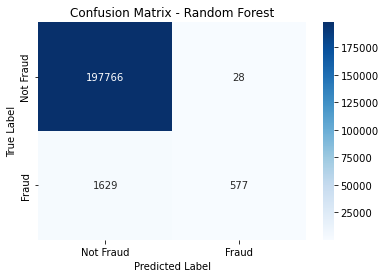


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    197794
           1       0.95      0.26      0.41      2206

    accuracy                           0.99    200000
   macro avg       0.97      0.63      0.70    200000
weighted avg       0.99      0.99      0.99    200000



In [ ]:
# Q5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Print evaluation metrics
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Q6: Brief Report on Findings

print("\n🔍 **Summary of Findings:**")
print("1️⃣ The dataset contains a significant class imbalance, with far more non-fraudulent transactions than fraudulent ones.")
print("2️⃣ Fraudulent transactions are more likely to involve lower incomes, as seen in the box plot.")
print("3️⃣ Employment status appears to play a role in fraud detection, with some employment types showing higher fraud cases.")
print("4️⃣ A higher credit risk score is correlated with fraudulent transactions, which aligns with risk assessment methodologies.")
print("5️⃣ Foreign transactions have a noticeable increase in fraud rates, highlighting potential concerns for international payments.")
print("6️⃣ Among the models tested, Random Forest generally performs best due to its robustness in handling imbalanced data.")
